SAMPON SALKKU ESIMERKKI - SAMPO PORTFOLIO EXAMPLE (BY TEEMU WARELL)

In [1]:
#Import all the necessary libraries for analysis
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

#Download Sampo Oyj daily stock price data starting from the purchase date for example 6.4.2020
tickers = ['SAMPO.HE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2020-4-6')['Adj Close']

#Download Sampo Oyj daily stock price data from 10 year period for historical comparison and future prediction    
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

#Download OMX Helsinki25 index daily price data starting from same date as Sampo Oyj for index comparison    
index = ['^OMXH25']    
indata = pd.DataFrame()
for t in index:
    indata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2020-4-6')['Adj Close']

#Returns calculation formula for my Sampo stock   
returns = (mydata / mydata.shift(1)) -1

#Calculate log returns, mean returns, price variance, drift and standard deviation
log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
drift.values
stdev.values

#Add intervals and iterations for future stock price prediction in Monte carlo simulation
t_intervals = 100
iterations = 10

#Daily returns formula
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

#Monte carlo simulation for stock price prediction
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

C:\Users\teemu\TWPython\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


SALKUN KEHITYS - PORTFOLIO DEVELOPMENT

Insert figure size and include daily stock data as x and daily index data as y. Name labels as correct names. Insert title and axl labels. Style the figure as you please. 

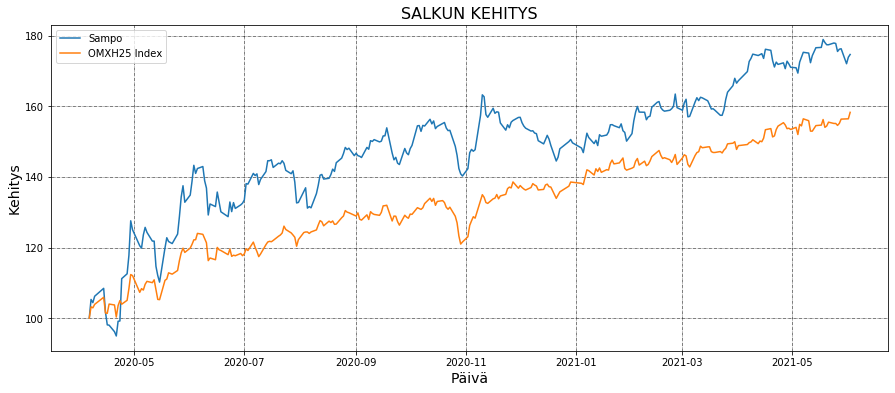

In [2]:
fig= plt.figure(figsize=(15,6))
x = (mydata / mydata.iloc[0] * 100)
z = (indata / indata.iloc[0] * 100)

plt.plot(x, label = 'Sampo')
plt.plot(z, label = 'OMXH25 Index')
plt.title('SALKUN KEHITYS', fontsize=16)
plt.ylabel('Kehitys', fontsize=14)
plt.xlabel('Päivä', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

PÄIVÄTUOTTO - DAILY RETURNS - VOLATILITY

Insert figure size and include daily returns data as x1 and daily index returns data as x2. Name labels as correct names. Insert title and axl labels. Style the figure as you please. 

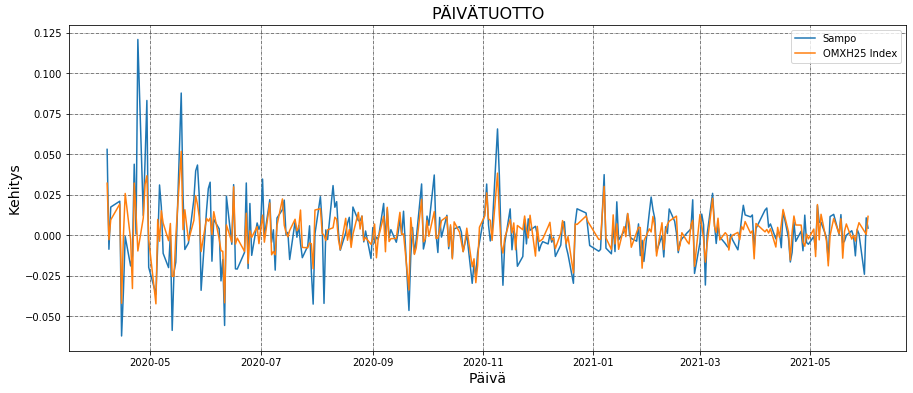

In [3]:
fig= plt.figure(figsize=(15,6))
x1 = returns
x2 = (indata / indata.shift(1)) -1

plt.plot(x1, label = 'Sampo')
plt.plot(x2, label = 'OMXH25 Index')
plt.title('PÄIVÄTUOTTO', fontsize=16)
plt.ylabel('Kehitys', fontsize=14)
plt.xlabel('Päivä', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

KESKIMÄÄRÄINEN VUOSITUOTTO - AVERAGE ANNUAL RETURN

Calculate average annual return for portfolio and index. Multiply mean returns with trading days (250). Round up, clean the result and add information about the results.

In [8]:
avg_a_returns = returns.mean()*250
ka_v_tuotto = float(avg_a_returns.round(2)) * 100
avg_a_u = u * 250
ka_v_u_tuotto = float(avg_a_u.round(2)) * 100
print (str(ka_v_tuotto) +' % Sampon salkun keskimääräinen vuosituotto')
print ('verrattuna...')
print (str(ka_v_u_tuotto) + ' % 10v. vertailuindeksin historiallinen vuosituotto')

53.0 % Sampon salkun keskimääräinen vuosituotto
verrattuna...
13.0 % 10v. vertailuindeksin historiallinen vuosituotto


VOLATILITEETTI - VOLATILITY (vuotuinen riski - annual risk)

Calculate annual volatility for portfolio and index. Multiply standard deviation of returns with trading days (250) power to two. Round up, clean the result and add information about the results.

In [14]:
vols = returns.std() * 250 ** 0.5
vola = float(vols.round(2) * 100)
vols_his = log_returns.std() * 250 ** 0.5
vola_his = float(vols_his.round(2)) * 100
print (str(vola)+' % Sampon salkun vuosittainen riski')
print ('vrt.')
print (str(vola_his)+ ' % 10v. vertailuindeksin vuosittainen riski')

31.0 % Sampon salkun vuosittainen riski
vrt.
23.0 % 10v. vertailuindeksin vuosittainen riski


ENNUSTE - PREDICTION (Monte Carlo Simulaatio - Monte Carlo Simulation)

Insert figure size and include monte carlo simulation data. Name labels as correct names. Insert title and axl labels. Style the figure as you please.

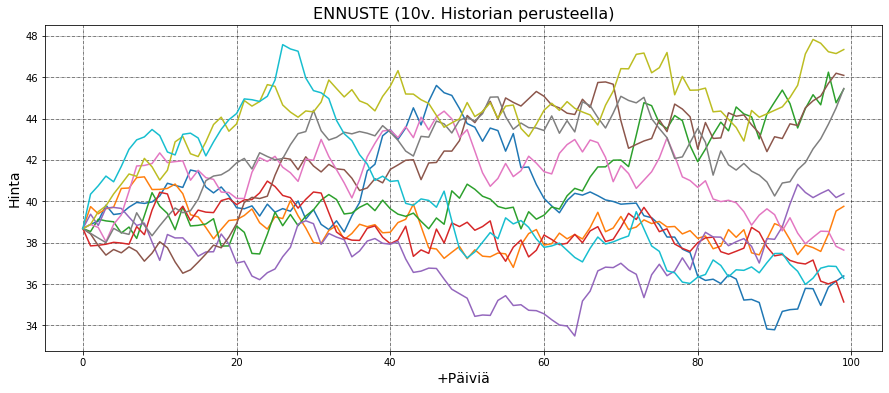

In [15]:
plt.figure(figsize= (15,6))
plt.title('ENNUSTE (10v. Historian perusteella)', fontsize=16)
plt.ylabel('Hinta', fontsize=14)
plt.xlabel('+Päiviä', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.plot(price_list)

MEDIAANI HINTAENNUSTE 10v. HISTORIAN PERUSTEELLA - MEAN STOCK PRICE PREDICTION BY 10 YEAR HISTORY

In [16]:
MCsimulation_price = float(round(price_list.mean(), 2))
MCsimulation_price

40.51